<a href="https://colab.research.google.com/github/yiju2313/Data/blob/master/1217_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
system("ls", TRUE)

[1] "sample_data"

In [4]:
install.packages(c("SportsAnalytics", "ggplot2"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
library(ggplot2)
library(SportsAnalytics)

In [9]:
NBA1516<-fetch_NBAPlayerStatistics("15-16")

`geom_smooth()` using formula 'y ~ x'



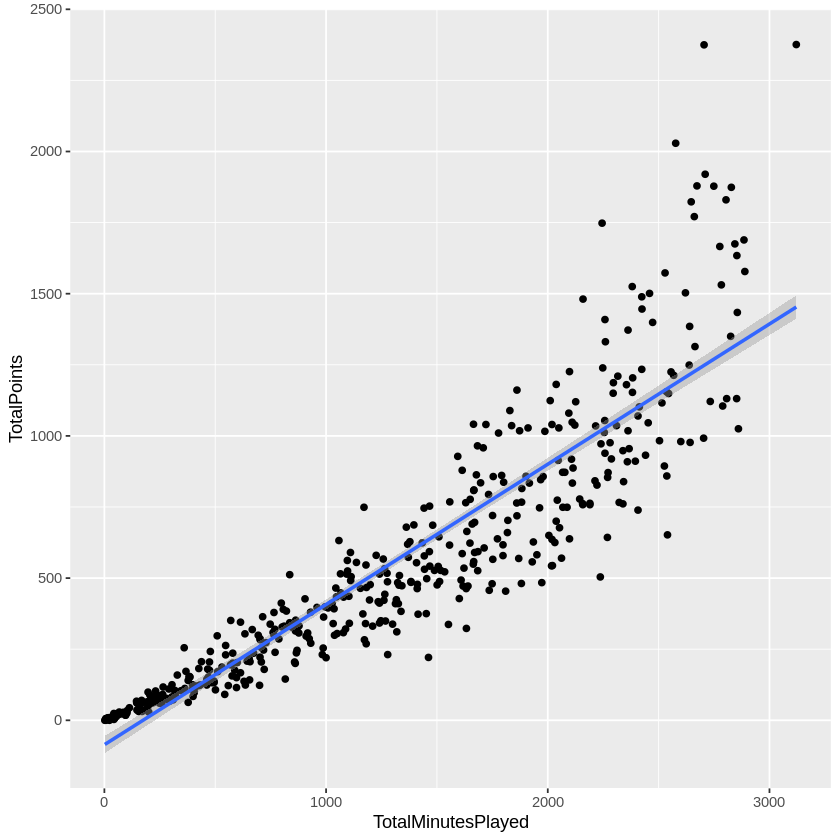

In [10]:
ggplot(NBA1516,aes(x=TotalMinutesPlayed,y=TotalPoints))+
geom_point()+geom_smooth(method = "glm")

In [11]:
lm(TotalPoints~TotalMinutesPlayed,data =NBA1516)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1516)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -85.9071              0.4931  


In [12]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,
data =NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
         -1.799e+01           -2.347e-04            1.256e+00  

Degrees of Freedom: 475 Total (i.e. Null);  473 Residual
Null Deviance:	    99360000 
Residual Deviance: 2160000 	AIC: 5367

In [13]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
data =NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          22.852223            -0.006537             1.275721  
         PositionPF           PositionPG           PositionSF  
         -39.416327           -65.034646           -38.522299  
         PositionSG  
         -52.175144  

Degrees of Freedom: 474 Total (i.e. Null);  468 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    99080000 
Residual Deviance: 1975000 	AIC: 5322

In [16]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [17]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [18]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank,

data = mydata, family = "binomial")

sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [19]:
OneVar<-glm(TotalPoints~TotalMinutesPlayed,data =NBA1516)
TwoVar<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,

data =NBA1516)

ThreeVar<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,

data =NBA1516)

c(OneVar$aic,TwoVar$aic,ThreeVar$aic)

[1] 6338.913 5366.763 5321.972

In [20]:
sum2<-summary(TwoVar)
sum2$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.798855e+01,5.659758251,-3.17832538,1.578333e-03
TotalMinutesPlayed,-2.347183e-04,0.009474631,-0.02477334,9.802462e-01
FieldGoalsAttempted,1.255794e+00,0.022239494,56.46682752,2.474028e-212


In [21]:
sum3<-summary(ThreeVar)
sum3$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),22.852222668,9.014714391,2.5349913,1.156964e-02
TotalMinutesPlayed,-0.006536874,0.009199968,-0.7105322,4.777281e-01
FieldGoalsAttempted,1.275721212,0.021647176,58.9324535,1.144607e-218
PositionPF,-39.416326742,9.936541704,-3.9668053,8.425605e-05
PositionPG,-65.034646215,10.269250388,-6.3329497,5.648565e-10
PositionSF,-38.522298887,10.488170409,-3.6729284,2.674727e-04
PositionSG,-52.175143670,9.985331185,-5.2251791,2.625062e-07


In [22]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
library(rpart)
DT<-rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1516)
DT

n=475 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 475 364 PF (0.15 0.23 0.21 0.18 0.23)  
    2) ThreesMade< 2.5 132  74 C (0.44 0.35 0.098 0.053 0.061)  
      4) Blocks>=4.5 89  37 C (0.58 0.38 0.011 0.011 0.011) *
      5) Blocks< 4.5 43  31 PF (0.14 0.28 0.28 0.14 0.16)  
       10) Steals< 2.5 29  19 PF (0.17 0.34 0.14 0.21 0.14) *
       11) Steals>=2.5 14   6 PG (0.071 0.14 0.57 0 0.21) *
    3) ThreesMade>=2.5 343 242 SG (0.035 0.19 0.25 0.23 0.29)  
      6) Assists>=170.5 96  39 PG (0.031 0.052 0.59 0.15 0.18) *
      7) Assists< 170.5 247 163 SG (0.036 0.24 0.12 0.26 0.34)  
       14) Blocks>=20.5 80  42 PF (0.062 0.48 0 0.26 0.2)  
         28) Steals< 59.5 58  21 PF (0.069 0.64 0 0.14 0.16) *
         29) Steals>=59.5 22   9 SF (0.045 0.045 0 0.59 0.32) *
       15) Blocks< 20.5 167  99 SG (0.024 0.13 0.17 0.26 0.41)  
         30) Assists< 81.5 110  68 SG (0.027 0.18 0.091 0.32 0.38)  
        

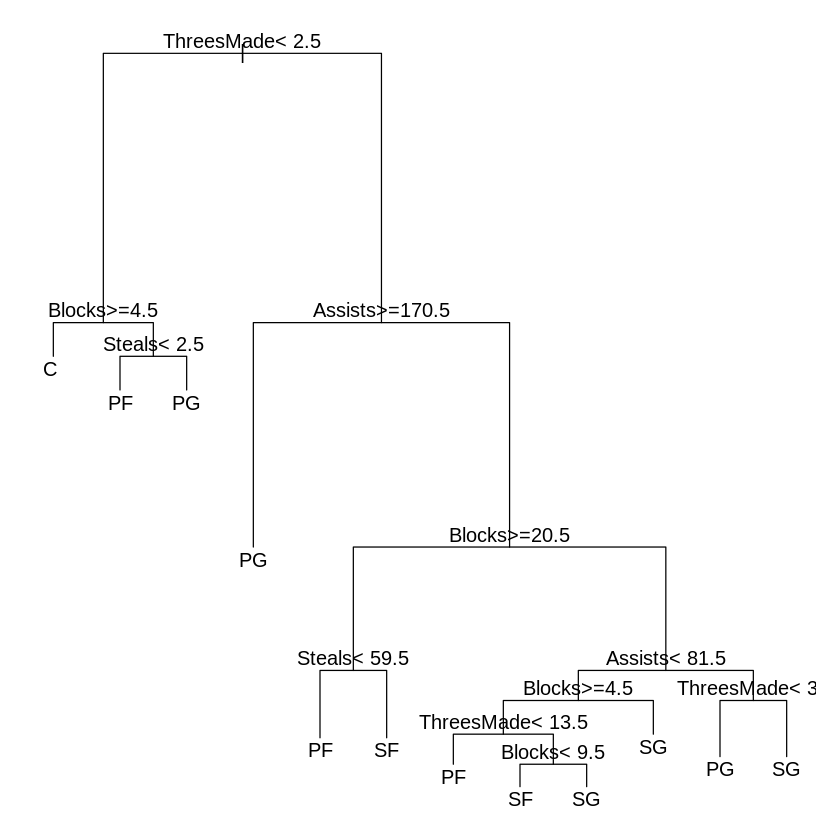

In [24]:
par(mfrow=c(1,1), mar = rep(1,4)) #下,左,上,右
plot(DT)
text(DT, use.n=F, all=F, cex=1)

In [25]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



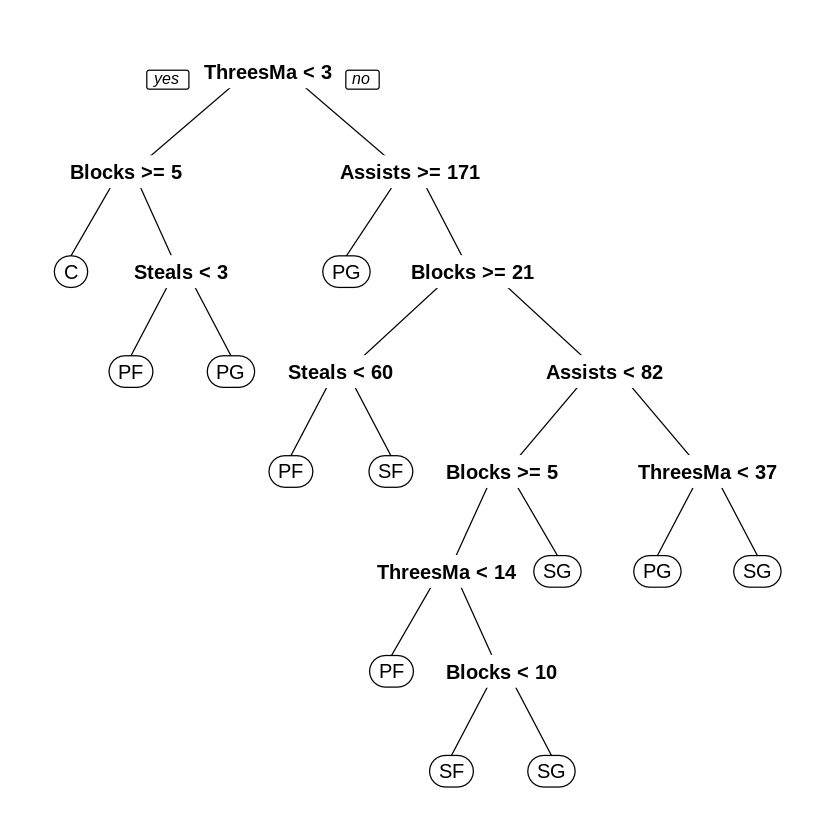

In [26]:
library(rpart.plot)
prp(DT)

ERROR: ignored

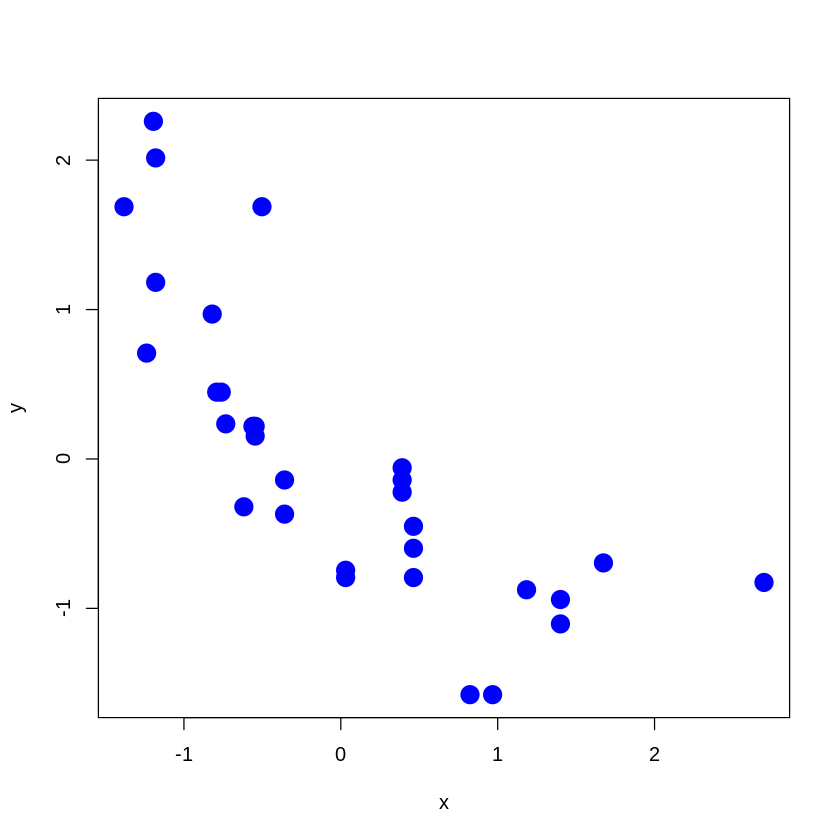

In [30]:
x<-scale(mtcars$hp[-1]);y<-scale(mtcars$mpg[-1])
plot(x,y,col="blue",pch=19,cex=2)
text(x+0.05,y+0.05,labels=labelCar)

In [31]:
dataFrame <- data.frame(x,y)
kmeansObj <- kmeans(dataFrame,centers=3)
names(kmeansObj)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [32]:
kmeansObj$cluster

[1] 1 2 1 1 1 3 2 2 1 1 1 1 1 3 3 3 2 2 2 1 1 1 3 1 2 2 2 3 1 3 1

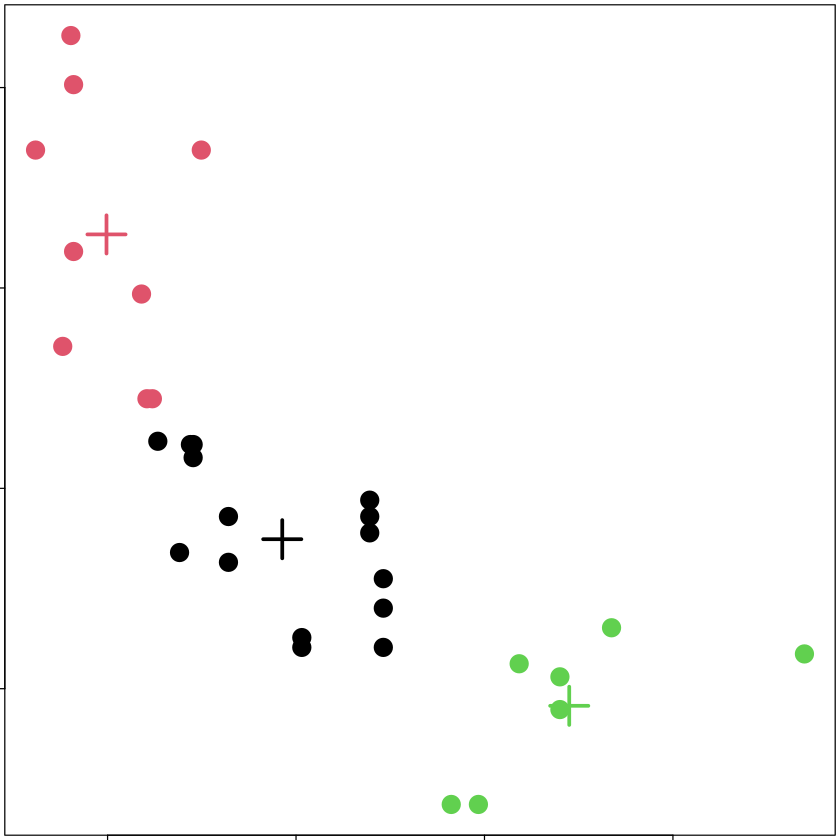

In [33]:
par(mar=rep(0.2,4))
plot(x,y,col=kmeansObj$cluster,pch=19,cex=2)
points(kmeansObj$centers,col=1:3,pch=3,cex=3,lwd=3)

In [35]:
if (!require('arules')){
install.packages("arules");
library(arules) 
}
if (!require('datasets')){
install.packages("datasets");
library(datasets) 
}
data(Groceries) 
Groceries@data@Dim 

Loading required package: arules

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arules’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




[1]  169 9835

In [37]:
rules <- apriori(Groceries, 

parameter = list(supp = 0.001, conf = 0.8), 
control = list(verbose=F))

options(digits=2)
inspect(rules[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [38]:
rules<-sort(rules, by="confidence", decreasing=TRUE) 
inspect(rules[1:5]) 

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [39]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
appearance = list(default="lhs",rhs="whole milk"), 
control = list(verbose=F)) 
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence") 
inspect(rulesR[1:5]) 

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [40]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
appearance = list(default="rhs",lhs="whole milk"), 
control = list(verbose=F))
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5])

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [ ]:
if (!require('SportsAnalytics')){
install.packages("SportsAnalytics")
library(SportsAnalytics)
}

In [43]:
NBA1819<-fetch_NBAPlayerStatistics("18-19")
NBA1819<-NBA1819[complete.cases(NBA1819),]

In [44]:
sample(1:10,3)

[1] 8 4 9

In [45]:
sample(1:nrow(NBA1516),nrow(NBA1516)/3)

[1] 149  40 212 440 195  93 122 389  66 175 424 379 304 108 131 343  41 115
 [19] 228 328 416 298 299 258 117  79 182 305 358 184 307 390 449 221 224  49
 [37] 313 136 282 145 123 264 234  96  22 291 297 208 462 342  57  10 406 248
 [55] 365 153 428  83 245 423 218 215 326 276 169  71  61 352 414 383 155 457
 [73] 464  60  36 375  19 137 126 158 319 116 437 102 214 314 445  85 469 160
 [91]  77  17 398 262 130 181 267 316 356 163 458 277 393 134 265 400 249 432
[109] 475  29 422 185 294  88 397 408 335  86 142 147 411 188  26 369 415  28
[127] 101 296 323 405 357 189 196  84 419 250 385 281 377 467  30 425 353 441
[145]  80  73 148  12 293 472 303 359 166 346 146 107 240  31

In [46]:
NBA1516$Test<-F 
NBA1516[sample(1:nrow(NBA1516),nrow(NBA1516)/3),"Test"]<-T
c(sum(NBA1516$Test==F),sum(NBA1516$Test==T))

[1] 318 158

In [47]:
fit<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+
Position+ThreesAttempted+FreeThrowsAttempted,
data =NBA1516[NBA1516$Test==F,])

summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.4574,8.395,1.7,8.6e-02
TotalMinutesPlayed,-0.0094,0.008,-1.2,2.4e-01
FieldGoalsAttempted,1.0217,0.025,40.9,8.1e-127
PositionPF,-18.3656,8.940,-2.1,4.1e-02
PositionPG,-41.9897,9.845,-4.3,2.7e-05
PositionSF,-23.9838,9.690,-2.5,1.4e-02
PositionSG,-41.3143,10.016,-4.1,4.8e-05
ThreesAttempted,0.1734,0.032,5.4,1.7e-07
FreeThrowsAttempted,0.7372,0.044,16.7,3.8e-45


In [48]:
library(MASS)
finalModel_B<-stepAIC(fit,direction = "backward",trace=FALSE)
summary(finalModel_B)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),11.02,7.877,1.4,1.6e-01
FieldGoalsAttempted,1.00,0.019,53.1,1.4e-157
PositionPF,-17.84,8.935,-2.0,4.7e-02
PositionPG,-40.75,9.795,-4.2,4.1e-05
PositionSF,-23.99,9.696,-2.5,1.4e-02
PositionSG,-40.43,9.994,-4.0,6.6e-05
ThreesAttempted,0.17,0.032,5.3,2.5e-07
FreeThrowsAttempted,0.74,0.044,16.7,3.7e-45


In [49]:
finalModel_F<-stepAIC(fit,direction = "forward",trace=FALSE)
summary(finalModel_F)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.4574,8.395,1.7,8.6e-02
TotalMinutesPlayed,-0.0094,0.008,-1.2,2.4e-01
FieldGoalsAttempted,1.0217,0.025,40.9,8.1e-127
PositionPF,-18.3656,8.940,-2.1,4.1e-02
PositionPG,-41.9897,9.845,-4.3,2.7e-05
PositionSF,-23.9838,9.690,-2.5,1.4e-02
PositionSG,-41.3143,10.016,-4.1,4.8e-05
ThreesAttempted,0.1734,0.032,5.4,1.7e-07
FreeThrowsAttempted,0.7372,0.044,16.7,3.8e-45


In [50]:
finalModel_Both<-stepAIC(fit,direction = "both",trace=FALSE)
summary(finalModel_Both)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),11.02,7.877,1.4,1.6e-01
FieldGoalsAttempted,1.00,0.019,53.1,1.4e-157
PositionPF,-17.84,8.935,-2.0,4.7e-02
PositionPG,-40.75,9.795,-4.2,4.1e-05
PositionSF,-23.99,9.696,-2.5,1.4e-02
PositionSG,-40.43,9.994,-4.0,6.6e-05
ThreesAttempted,0.17,0.032,5.3,2.5e-07
FreeThrowsAttempted,0.74,0.044,16.7,3.7e-45


In [51]:
predictPoint<-predict(finalModel_Both, #Test==T, test data
newdata = NBA1516[NBA1516$Test==T,])

cor(x=predictPoint,y=NBA1516[NBA1516$Test==T,]$TotalPoints)

[1] NA

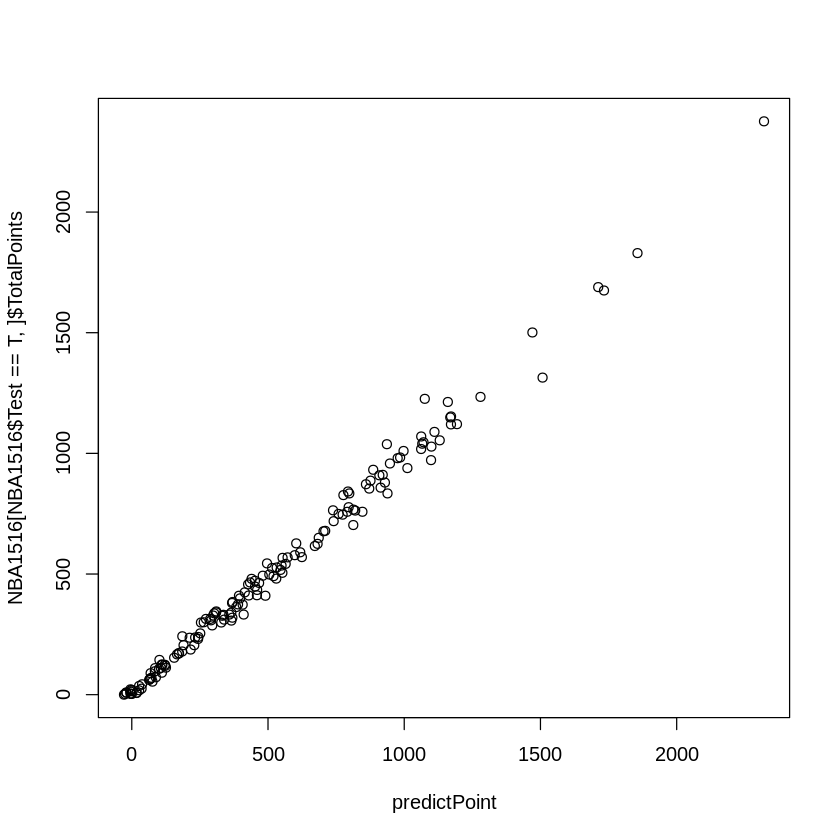

In [52]:
plot(x=predictPoint,y=NBA1516[NBA1516$Test==T,]$TotalPoints)